# Report Generation from Actigraphy and GGIR outs

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from fpdf import FPDF
import actipy



The following is an example from one subject

In [6]:
df = pd.read_csv('../../data/Activity-Report-VossLab.csv')
sub = df.iloc[3]
sub = pd.DataFrame(sub)
sub = sub.T
sub


,False,Data Set,Subject Name,Serial Number,Details,Validated Data?,Log Diary,Weight (lbs),Worn on Wrist?,Activity kcals,...,Vector Magnitude CPM,Steps Counts,Steps Average Counts,Steps Max Counts,Steps Per Minute,Lux Average Counts,Lux Max Counts,Number of Epochs,Time,Calendar Days
3,True,498 (2015-07-21)60sec.agd,498,TAS1D51140038,Details...,Manual (9/23/2015),None,155.0,True,12101.409,...,1925.1,188402.0,19.2,144.0,19.2,0.0,0.0,9838.0,6D 19H 58M 0S,7.0


## What to Report
- Total MVPA
- Average MVPA
- Total Vigorous
- Average Vigorous
- Total Moderate
- Average Moderate
- Total Light
- Average Light
- Total MET minutes
- Average MET minutes
- Total Sedentary time
- Average sedentary time
- Total Sleep
- Average Sleep
- Average RHR
- Estimated VO2 Max

#### Start Creating Graphs

In [7]:
sub



,False,Data Set,Subject Name,Serial Number,Details,Validated Data?,Log Diary,Weight (lbs),Worn on Wrist?,Activity kcals,...,Vector Magnitude CPM,Steps Counts,Steps Average Counts,Steps Max Counts,Steps Per Minute,Lux Average Counts,Lux Max Counts,Number of Epochs,Time,Calendar Days
3,True,498 (2015-07-21)60sec.agd,498,TAS1D51140038,Details...,Manual (9/23/2015),None,155.0,True,12101.409,...,1925.1,188402.0,19.2,144.0,19.2,0.0,0.0,9838.0,6D 19H 58M 0S,7.0


In [8]:

def create_df(sub):
    sub = pd.DataFrame(sub)
    if sub.shape[1] == 1:
        sub = sub.T
    
    subject = sub['Subject Name']
    mvpa_tot = sub['Time in MVPA']
    mvpa_avg = sub['Average MVPA Per Day']
    vig_tot = sub['Time in Vigorous']
    vig_perc = sub['% in Vigorous']
    mod_tot = sub['Time in Moderate']
    mod_perc = sub['% in Moderate']
    light_tot = sub['Time in Light']
    light_perc = sub['% in Light']
    sed_avg = sub['Daily Average of Sedentary Bouts']
    sed_tot = sub['Total Length of Sedentary Bouts']
    sed_perc = sub['% in Sedentary']
    kcal_avg = sub['Average kcals per day']
    cal_days = sub['Calendar Days']
    time = sub['Time']


    sub_data = pd.DataFrame({
        'Subject': subject,
        'Time': time,
        'Calendar Days': cal_days,
        'Time in MVPA': mvpa_tot,
        'Average MVPA Per Day': mvpa_avg,
        'Time in Vigorous': vig_tot,
        '% in Vigorous': vig_perc,
        'Time in Moderate': mod_tot,
        '% in Moderate': mod_perc,
        'Time in Light': light_tot,
        '% in Light': light_perc,
        'Daily Average of Sedentary Bouts': sed_avg,
        'Total Length of Sedentary Bouts': sed_tot,
        '% in Sedentary': sed_perc,
        'Average kcals per day': kcal_avg
    })
    return sub_data

sub_data = create_df(sub)
sub_data

,Subject,Time,Calendar Days,Time in MVPA,Average MVPA Per Day,Time in Vigorous,% in Vigorous,Time in Moderate,% in Moderate,Time in Light,% in Light,Daily Average of Sedentary Bouts,Total Length of Sedentary Bouts,% in Sedentary,Average kcals per day
3,498,6D 19H 58M 0S,7.0,1D 1H 33M 0S,3H 39M 0S,0S,0.00 %,1D 1H 33M 0S,15.58 %,2D 17H 2M 0S,39.66 %,6H 49M 34S,1D 23H 47M 0S,44.76 %,1728.773


/var/folders/1w/l9hx8l952r57k_qmjhw7qc500000gn/T/ipykernel_70947/1558535768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentage_df[col] = percentage_df[col].str.rstrip('%').astype('float') / 100


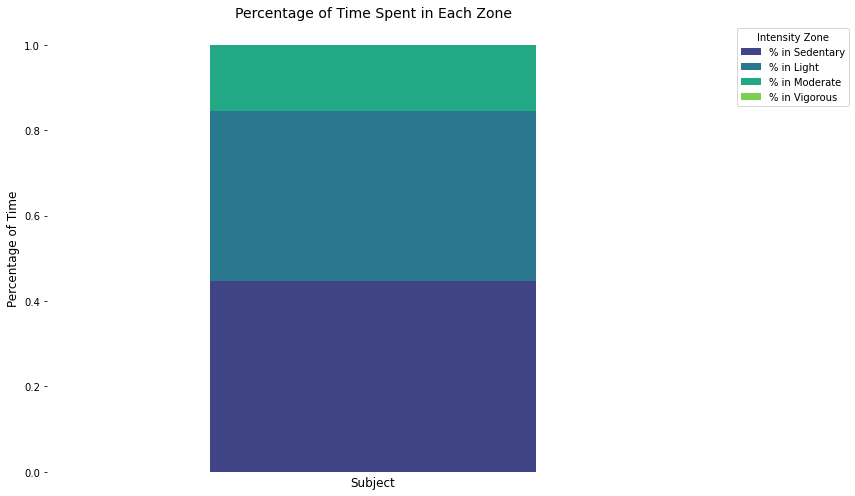

In [9]:
required_columns = ['% in Sedentary', '% in Light', '% in Moderate', '% in Vigorous']
    
if all(col in sub.columns for col in required_columns):
    # Prepare the data
    percentage_df = sub[['% in Sedentary', '% in Light', '% in Moderate', '% in Vigorous']]
    
    # Turn the percentages into decimals
    for col in percentage_df.columns:
        percentage_df[col] = percentage_df[col].str.rstrip('%').astype('float') / 100
    
    # Set color palette using seaborn
    sb.set_palette("viridis", len(percentage_df.columns))

    # Plot the stacked bar chart with seaborn colors
    ax = percentage_df.plot(kind='bar', stacked=True, figsize=(12, 7), color=sb.color_palette("viridis", len(percentage_df.columns)))

    # Adding extra seaborn-style touches
    plt.ylabel('Percentage of Time', fontsize=12)
    plt.xlabel('Subject', fontsize=12)
    plt.title('Percentage of Time Spent in Each Zone', fontsize=14)
    plt.xticks(rotation=45, ha='right', ticks=[])  # Rotate x-axis labels for better readability
    plt.legend(title='Intensity Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add a grid for better visual clarity
    sb.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

([<matplotlib.patches.Wedge at 0x3239a87f0>,
 [Text(-1.0851288722446697, 0.1802646127807991, 'Sedentary'),
  Text(0.8729691414016277, -0.6692719015172423, 'Light'),
  Text(0.5171643358915319, 0.9708455333789567, 'Moderate'),
  Text(-1.0298943237858331e-07, 1.0999999999999954, 'Vigorous')],
 [Text(-0.5918884757698198, 0.0983261524258904, '44.8%'),
  Text(0.4761649862190696, -0.36505740082758664, '39.7%'),
  Text(0.28208963775901735, 0.5295521091157945, '15.6%'),
  Text(-5.6176054024681796e-08, 0.5999999999999974, '0.0%')])

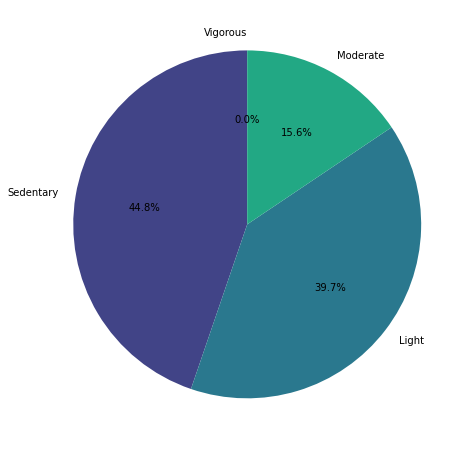

In [15]:
#create a pie chart of percentage of time spent in each zone
plt.figure(figsize=(8, 8))
for col in sub_data[['% in Sedentary', '% in Light', '% in Moderate', '% in Vigorous']]:
    sub_data[col] = sub_data[col].str.rstrip('%').astype('float') / 100
plt.pie(sub_data[['% in Sedentary', '% in Light', '% in Moderate', '% in Vigorous']].iloc[0], labels=['Sedentary', 'Light', 'Moderate', 'Vigorous'], autopct='%1.1f%%', startangle=90)


In [22]:
sub_data.columns
import re
def convert_to_seconds(time_str):
    # Use regular expression to capture days, hours, minutes, and seconds
    pattern = r'(?:(\d+)D)?\.(?:(\d+)H)?\.(?:(\d+)M)?\.(?:(\d+)S)?'
    match = re.match(pattern, time_str)
    
    if not match:
        raise ValueError(f"Invalid time format: {time_str}")

    days = int(match.group(1)) if match.group(1) else 0
    hours = int(match.group(2)) if match.group(2) else 0
    minutes = int(match.group(3)) if match.group(3) else 0
    seconds = int(match.group(4)) if match.group(4) else 0

    total_seconds = days * 86400 + hours * 3600 + minutes * 60 + seconds
    return total_seconds

# Example usage
for col in sub_data[['Time in MVPA', 'Time in Vigorous', 'Time in Moderate', 'Time in Light']]:
    print(f"Converting {col}...")
    sub_data[col] = sub_data[col].apply(convert_to_seconds)
    print(f"Converted {col} to seconds.")

Converting Time in MVPA...


ValueError: Invalid time format: 1D 1H 33M 0S

In [19]:
#Create PDF
import warnings
warnings.simplefilter('default', DeprecationWarning)

pdf = FPDF(orientation="P", unit="mm", format="A4")
pdf.add_page()
pdf.set_font("helvetica", size = 50)
pdf.cell(200, 10, text="Activity Report", align = 'C')
pdf.set_font("helvetica", size = 30)
pdf.cell(200, 10, text="Subject: " + subject, align = 'C',)

pdf.output('../out/report-tests/activity-report.pdf')

NameError: name 'subject' is not defined